<a href="https://colab.research.google.com/github/keng-oh/colab/blob/master/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 自然言語処理


In [0]:
# Google Driveをマウント
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls drive/'My Drive'/'Colab Notebooks'/data-set/movie_data.csv

'drive/My Drive/Colab Notebooks/data-set/movie_data.csv'


In [0]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

# csvファイルの読み込み
df = pd.read_csv("drive/My Drive/Colab Notebooks/data-set/movie_data.csv", header=0)
df.head()

,review,sentiment
0,I finally managed to sit through a whole episo...,0
1,Just what the world needed-another superficial...,0
2,I have to say despite it's reviews Angels in t...,1
3,Only the chosen ones will appreciate the quali...,1
4,Anne (Natalie Portman) tells us about how much...,1


In [0]:
# 2500件のレビューのみを抽出
df = df[0: 2500]

# サンプル数を確認
df.shape

(2500, 2)

In [0]:
# 各変数の型を確認
df.dtypes

review       object
sentiment     int64
dtype: object

In [0]:
# 0番目のサンプルを確認
print('sentiment: \n' + str(df['sentiment'][0])) # 0番目のサンプルのクラスラベルを出力
print('review: \n' + df['review'][0]) # 0番目のサンプルのレビューを出力

sentiment: 
0
review: 
I finally managed to sit through a whole episode of this show. I was very, very tired. Clearly. Previously I would always have to turn it off because I thought it was that bad. Watching a full episode convinces me that it really is that bad. I couldn't even tell you what happened but I distinctively remember not laughing. For people who think this is the new All in the Family or Married with Children...have you ever actually WATCHED those shows? They are well written and well acted and most importantly, funny! This show is NOT funny. You might think so if this is the first sitcom you have ever watched. I cannot see who else would. I echo all previous sentiments about Arrested Development, etc... It's probably my own fault for getting frustrated with television and not watching it, thereby allowing the stupid people to dictate what actually stays on the air.


In [0]:
# クレンジング元のデータを表示
# ピリオド区切りで､ひとつの文章を取り出すことができる
df.iloc[12,0].split(".")[0]

"TACHIGUI: THE AMAZING LIVES OF THE FAST-FOOD GRIFTERS Japanese title: Tachiguishi Retsuden<br /><br />Director: Mamoru Oshii Featuring: Toshio Suzuki, Mako Hyodo, Kenji Kawai, Shinji Higuchi, Katsuya Terada Narrated by Koichi Yamadera ----------------------------------------<br /><br />Way back in 1995, Mamoru Oshii unleashed his dazzling animation feature Ghost In The Shell, which helped consolidate anime's international acceptance - and also burrowed itself into Andy and Larry Wachowski's overall concept for The Matrix"

In [0]:
#正規表現を扱うモジュールのインポート
import re

def remove_html_tag(text):
    """
    HTMLタグを削除する関数
    """
    # <>の間にある>以外の文字を0文字以上であるだけ一致
    pattern = re.compile(r"<[^>]*>")
    #一致したものを空白と置換
    # 空白を入れないと､単語の切れ目がわからなくなってしまう
    removed = re.sub(pattern, " ", text)
    return removed

In [0]:
# remove_html_tag関数を使用して、htmlタグを削除
df["review"] = df["review"].apply(remove_html_tag)

# HTMLタグが削除されていることを確認
df.iloc[12,0].split(".")[0]

"TACHIGUI: THE AMAZING LIVES OF THE FAST-FOOD GRIFTERS Japanese title: Tachiguishi Retsuden  Director: Mamoru Oshii Featuring: Toshio Suzuki, Mako Hyodo, Kenji Kawai, Shinji Higuchi, Katsuya Terada Narrated by Koichi Yamadera ----------------------------------------  Way back in 1995, Mamoru Oshii unleashed his dazzling animation feature Ghost In The Shell, which helped consolidate anime's international acceptance - and also burrowed itself into Andy and Larry Wachowski's overall concept for The Matrix"

In [0]:
def remove_punct(text):
    """
    顔文字（emoticons）のみを残し､句読文字（punctation）の削除を行う｡
    """
    # 目の部分: : or ; or =
    # 鼻の部分: -
    # 口の部分: ) or ( or D or P
    pattern = re.compile(r"(?::|;|=)(?:-)?(?:\)|\(|D|P)")
    # パターンに当てはまる文字列をすべて抽出して､リストに格納
    # いったんリストに保存しておいて､あとですべての記号を削除したtextに付け足す
    emoticons = pattern.findall(text)
    # 文頭などにある大文字を小文字に変換
    lower = text.lower()
    # [\W]+で記号の並びを捕捉して空白ひとつに置き換える
    removed = re.sub(r"[\W]+", " ", lower)
    # 顔文字を半角スペース区切りでひとつの文字列に結合
    emoticons = " ".join(emoticons)
    # 顔文字に含まれる鼻の部分を削除する
    # 鼻があってもなくても､目と口が同じなら同じ顔文字として認識されるようになる
    emoticons = emoticons.replace("-","")
    # lowerとemoticonsを結合
    # 単語を区切るため､間には半角スペースを入れておく
    connected = removed + ' ' + emoticons
    return connected

In [0]:
# 句読点のあるレビューを確認
df.iloc[4,0].split(".")[0]

'Anne (Natalie Portman) tells us about how much she hates her mother, Adele (Susane Sarandon)'

In [0]:
# 顔文字のあるレビューを確認（処理前）
df.iloc[935,0].split(".")[0]

'Let me be the first non Australian to comment on this :) I got the movie for Hugo Weaving and I watched it to the end'

In [0]:
# reviewのデータを､句読文字を削除したものに置き換える
df["review"] = df["review"].apply(remove_punct)

# 句読点のあるレビューを確認（処理後）
# 句読点が削除されたので､splitが反映されなくなっている
df.iloc[4,0].split(".")[0]

'anne natalie portman tells us about how much she hates her mother adele susane sarandon that s how the movie begins adele decided that her and her daughter were moving to california without asking anyone and leaving her husband without any reason the story is about the relationship between the mother and the daughter it s really deep and touching thanks to the great work of the actresses natalie was nominated to a golden globe for that role she is one of the most talented actresses i ever saw and so is sarandon they really look like mother daughter the soundtrack is also great the movie is incredible 10 out of 10  '

In [0]:
# 顔文字のあるレビューを確認（処理後）
# 文末の顔文字が残っている
df.iloc[935,0].split(".")[0]

'let me be the first non australian to comment on this i got the movie for hugo weaving and i watched it to the end it s one of those drama of life films as my mother used to call a movie that depicts a real life story with no extraordinary events and that is mostly descriptive i liked the light and the girls the rest was without too much fault but without too much merit either i yearned for something like the interview or at least some matrix villain element here and there but nothing out of the ordinary the story does teach one about facing one s own destiny and break free from the environment others build for you but this happens when the life giving peach factory in the area is about to close so not much of an effort to change things is required the smart american beauty sound alike song in the background could have been part of a larger soundtrack but just that one playing over and over again became annoying after 100 minutes of film in the end i guess it did his job of presenting

In [0]:
# 形態素解析をするjanomeをインストールする(初回のみコメントアウトを外して実行してください)
# ! pip install janome

     |████████████████████████████████| 25.1MB 60.7MB/s 


In [0]:
from janome.tokenizer import Tokenizer

# このテキストを形態素解析する
text = '私は東京都に住んでいます｡'

t = Tokenizer()
tokens = t.tokenize(text)

# 形態素解析した結果を表示
for token in tokens:
    print(token)

私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
東京	名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー
都	名詞,接尾,地域,*,*,*,都,ト,ト
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
住ん	動詞,自立,*,*,五段・マ行,連用タ接続,住む,スン,スン
で	助詞,接続助詞,*,*,*,*,で,デ,デ
い	動詞,非自立,*,*,一段,連用形,いる,イ,イ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス
｡	名詞,サ変接続,*,*,*,*,｡,*,*


In [0]:
# nltkをインストール(初回のみコメントアウトを外して実行してください)
# ! pip install nltk -q

In [0]:
import nltk

# PorterStemmerという､ステミングを行うアルゴリズムを指定
# 処理を実行するインスタンスを生成
stemmer = nltk.PorterStemmer()

# programへステミング
print(stemmer.stem('programming'))
print(stemmer.stem('programs'))

# initiへステミング
print(stemmer.stem('initial'))
print(stemmer.stem('initialize'))
print(stemmer.stem('initialization'))

program
program
initi
initi
initi


In [0]:
def porter_stem(text):
    '''
    ステミングを行う
    '''
    stemmer = nltk.PorterStemmer()
    stem_ls = []
    # textから各単語を順番に抽出
    for i in text.split():
        # ステミングを行い､stem_lsに格納
        try:
            stem_ls.append(stemmer.stem(i))
        # 何らかのエラーが起きたら､単語をそのまま保存
        except:
            stem_ls.append(i)
    # stem_lsの要素を半角スペース区切りで結合
    # ひとつの文字列に変換
    stemmed = " ".join(stem_ls)
    return stemmed

In [0]:
# ステミングを行う前の文章を確認
# 長いので､初めの100文字のみ
df.iloc[30,0][:100]

'on halloween a town is terrorized by a lunatic with a big pumpkin for a head bad acting compromised '

In [0]:
# ステミングを適用
df["review"] = df["review"].apply(porter_stem)

# ステミングを行った後の文字列を確認
# 長いので､初めの100文字のみ
df.iloc[30,0][:100]

'on halloween a town is terror by a lunat with a big pumpkin for a head bad act compromis mostli of l'

In [0]:
# stopwordsのダウンロード
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# 英語のstopwordsのリスト化
from nltk.corpus import stopwords
stop = stopwords.words("english")

def strip_stop(text):
    """
    ストップワードを除去
    """
    # 空のリストに､文章内のstopwords以外の単語を格納していく
    words = []
    # テキストを半角スペースごとに分割
    for word in text.split(' '):
        # 抽出した単語がstopwordsの一覧に含まれていなければリストに格納する
        if word not in stop:
            words.append(word)
    # stopwords以外の単語をスペースを空けて並べる
    text = " ".join(words)
    return text

In [0]:
# stopwordsを除去する前の文章を出力
df.iloc[4, 0]

'ann natali portman tell us about how much she hate her mother adel susan sarandon that s how the movi begin adel decid that her and her daughter were move to california without ask anyon and leav her husband without ani reason the stori is about the relationship between the mother and the daughter it s realli deep and touch thank to the great work of the actress natali wa nomin to a golden globe for that role she is one of the most talent actress i ever saw and so is sarandon they realli look like mother daughter the soundtrack is also great the movi is incred 10 out of 10'

In [0]:
# strip_stopを適用
df["review"] = df["review"].apply(strip_stop)

# stopwordsを除去した後の文章を出力
df.iloc[4,0]

'ann natali portman tell us much hate mother adel susan sarandon movi begin adel decid daughter move california without ask anyon leav husband without ani reason stori relationship mother daughter realli deep touch thank great work actress natali wa nomin golden globe role one talent actress ever saw sarandon realli look like mother daughter soundtrack also great movi incred 10 10'

In [0]:
# BoW表現の生成
# 出現回数が5回以下､あるいは30%以上の単語を削除して次元削減
# ストップワードの除去（先程実行したが､このタイミングでも実行可能）
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.3, min_df=5, stop_words='english')
cv.fit(df['review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.3, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
# vocabraryで単語とidの対応を確認する(下の#を外して実行してください。)
cv.vocabulary_

In [0]:
# テキストをBoWの表現形式に変換
bow = cv.transform(df['review'])
# 扱いやすいようにarray形式に変換
bow = bow.toarray()
# 単語の名称を抽出
feature_names = cv.get_feature_names()

# bowの中身を確認
print(type(bow)) # array形式
print(bow.shape) # 2500文書､5347単語
print(feature_names[5000:5020]) # 5005番目の単語は'understand'
print(bow[350:360, 5000:5020]) # bowの一部分を出力

<class 'numpy.ndarray'>
(2500, 5347)
['undermin', 'underneath', 'underr', 'underst', 'understand', 'understat', 'understood', 'underwat', 'undevelop', 'undoubtedli', 'uneven', 'unexpect', 'unexplain', 'unfair', 'unfaith', 'unfathom', 'unfinish', 'unfold', 'unforgett', 'unfortun']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [0]:
# 入力は先ほど作成したBow、正解ラベルはsentiment
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df["sentiment"], test_size=0.3, random_state=0)

# ロジスティック回帰の学習
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# 性能指標を確認する関数
y_pred_train = lr.predict(X_train)
def print_metrics(model, data, label):
    from sklearn import metrics
    pred = model.predict(data)
    print('accuracy: %.3f' % metrics.accuracy_score(label, pred)) # 正答率
    print('recall: %.3f' % metrics.recall_score(label, pred, average='macro')) # 再現率（マクロ平均）
    print('precision: %.3f' % metrics.precision_score(label, pred, average='macro')) # 適合率（マクロ平均）
    print('f1_score: %.3f' % metrics.f1_score(label, pred, average='macro')) # f値（マクロ平均）

In [0]:
# 性能指標を確認（train）
print_metrics(lr, X_train, y_train)

accuracy: 1.000
recall: 1.000
precision: 1.000
f1_score: 1.000


In [0]:
# 性能指標を確認（test）
print_metrics(lr, X_test, y_test)

accuracy: 0.811
recall: 0.811
precision: 0.811
f1_score: 0.811


In [0]:
# sklearnの中に含まれている、TfidfTransformerを使用
from sklearn.feature_extraction.text import TfidfTransformer
# インスタンスを生成
tfidf = TfidfTransformer(sublinear_tf=True)
# BoWの行列をTf-Idf値に置き換え
# BoWの行列を事前に小数型に変換しておく
X_train_tfidf = tfidf.fit_transform(X_train.astype('f')).toarray()
X_test_tfidf = tfidf.fit_transform(X_test.astype('f')).toarray()

# ロジスティック回帰を学習
# 正解ラベルはy_train, y_testを用いればよい
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# 性能指標を確認（train）
print_metrics(lr_tfidf, X_train_tfidf, y_train)

accuracy: 0.966
recall: 0.966
precision: 0.966
f1_score: 0.966


In [0]:
# 性能指標を確認（test）
print_metrics(lr_tfidf, X_test_tfidf, y_test)

accuracy: 0.849
recall: 0.849
precision: 0.850
f1_score: 0.849


In [0]:
# mglearnのインストール(初回のみコメントアウトを外して実行してください)
# ! pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


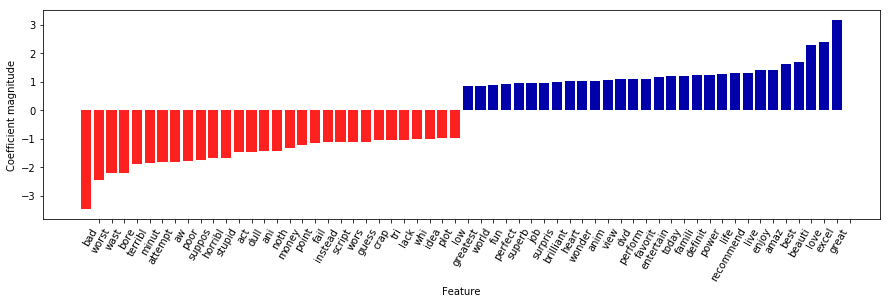

In [0]:
# ロジスティック回帰の係数を大きい順に可視化
# 赤色はnegativeに強く影響する単語､青色はpositiveに強く影響する単語
import mglearn
mglearn.tools.visualize_coefficients(lr_tfidf.coef_, feature_names, n_top_features=30)

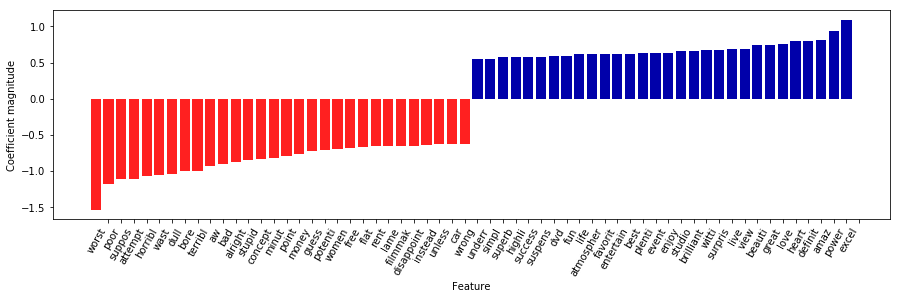

In [0]:
# Tf-Idfを利用しない場合
import mglearn
mglearn.tools.visualize_coefficients(lr.coef_, feature_names, n_top_features=30)

In [0]:
# LDAによるトピックの抽出
# トピックの数を5に指定
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method='batch', random_state=0)
# BoW形式のデータを変換
document_topics = lda.fit_transform(X_train_tfidf)

print(lda.components_.shape) # components_アトリビュートの次元を出力
print(lda.components_[:, :5]) # components_アトリビュートの4番目までの単語とする

(5, 5347)
[[ 0.20005443  0.20015424  0.20004816  0.20004937  0.20005734]
 [ 0.20005995  0.20013648  0.20011676  0.20006514  0.20005694]
 [ 0.20005178  0.20005694  0.20004826  0.20004949  0.20005745]
 [ 2.28168101 21.03937179  3.5437552   2.78817073  3.74794059]
 [ 0.2000517   0.20006743  0.20004818  0.20004949  0.20005735]]


In [0]:
# 各トピックについて､重要度の高い順に並び替える
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# 処理の都合上､feature_namesをarrayの形式に変換
feature_names = np.array(feature_names)
# 各トピックに関連性が強い単語Top10を出力
mglearn.tools.print_topics(topics=range(5), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=5)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
tarzan        streep        helena        realli        falk          
crous         meryl         sarandon      great         columbo       
mantegna      shatner       natali        act           wan           
weissmul      connor        jacob         bad           uzumaki       
strap         stanwyck      goodnight     look          loyalti       




In [0]:
# 25トピックに縮約
lda_2 = LatentDirichletAllocation(n_components=25, learning_method='batch', random_state=0)
X_train_lda = lda_2.fit_transform(X_train_tfidf)
X_test_lda = lda_2.fit_transform(X_test_tfidf)

# ロジスティック回帰を学習
lr_lda = LogisticRegression()
lr_lda.fit(X_train_lda, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# 性能指標を確認（train）
print_metrics(lr_lda, X_train_lda, y_train)

accuracy: 0.560
recall: 0.558
precision: 0.563
f1_score: 0.551


In [0]:
# 性能指標を確認（test）
print_metrics(lr_lda, X_test_lda, y_test)

accuracy: 0.495
recall: 0.499
precision: 0.248
f1_score: 0.331
